In [110]:
import numpy as np
import pandas as pd
import ast
from tabulate import tabulate
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [111]:
RawData = pd.read_excel("SURVEY RESULTS_2024.xlsx")

In [112]:
# Define a dictionary to map old column names to new column names
column_name_mapping = {
    'Which age group do you belong to?': 'Age Group',
    'What is your gender?': 'Gender',
    'Which category do you currently belong to?': 'Car Ownership',
    'Which of the following best describes you?': 'Marital Status',
    'Which of these factors are important to you when deciding which car to purchase?': 'Purchasing Factors',
    'How likely are you to opt for customised vehicle if there were no extra charges? ': 'Likelihood of Customization',
    'Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ': 'Exterior Customisation',
    'Which of the following interior components would you choose to customise (texture, layout, size, etc)? ': 'Interior Customisation',
    'How much are you willing to spend on car customisation if surcharges are applicable?': 'Cost of Customisation',
    'Are you interested in designing your own components to personalise your car? ': 'Self Design',
    'How much are you willing to pay for the personalised design? ': 'Cost of Self Design',
    'Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)': '3D exp',
    'Please give us any design ideas to make the car uniquely Singaporean.': 'SG ideas',
}

# Use the rename method to apply the changes
RawData.rename(columns=column_name_mapping, inplace=True)

In [113]:
# Convert columns to string type
RawData = RawData.astype({
    'Age Group': 'string',
    'Gender': 'string',
    'Car Ownership': 'string',
    'Marital Status': 'string',
    'Purchasing Factors': 'string',
    'Likelihood of Customization': 'string',
    'Exterior Customisation': 'string',
    'Interior Customisation': 'string',
    'Cost of Customisation': 'string',
    'Self Design': 'string',
    'Cost of Self Design': 'string',
    '3D exp': 'string',
    'SG ideas': 'string',
})

# Display the updated DataFrame
print(RawData.dtypes)


Age Group                      string
Gender                         string
Car Ownership                  string
Marital Status                 string
Purchasing Factors             string
Likelihood of Customization    string
Exterior Customisation         string
Interior Customisation         string
Cost of Customisation          string
Self Design                    string
Cost of Self Design            string
3D exp                         string
SG ideas                       string
dtype: object


In [114]:
NewData = RawData.drop(RawData.columns[[9, 10, 11, 12]], axis = 1) # for market basket analysis
NewData1 = RawData.drop(RawData.columns[12], axis = 1)             # for kmeans
NewData.head(5)

In [115]:
# Fill empty values with 'NA'
NewData = NewData.fillna('NA')

In [116]:
# Splitting string values

NewData["Car Ownership"] = NewData["Car Ownership"].str.split(pat = ",", n = -1, expand = False)
NewData["Purchasing Factors"] = NewData["Purchasing Factors"].str.split(pat = ";", n = -1, expand = False)
NewData["Exterior Customisation"] = NewData["Exterior Customisation"].str.split(pat = ";", n = -1, expand = False)
NewData["Interior Customisation"] = NewData["Interior Customisation"].str.split(pat = ";", n = -1, expand = False)

FinalData = NewData

,Age Group,Gender,Car Ownership,Marital Status,Purchasing Factors,Likelihood of Customization,Exterior Customisation,Interior Customisation,Cost of Customisation
0,20-30,Male,"[Do not own a car, but planning to purchase i...",Single,"[Price, Functionality, Size, Customisable opti...",Very likely,[Grilles],[Centre compartment],100-500
1,20-30,Female,"[Do not own a car, but planning to purchase i...",Single,"[Price, Brand name, Aesthetics, Technological ...",Likely,"[Wheels, Grilles, Headlights, Side mirrors]",[Centre compartment],under 500
2,20-30,Male,"[Do not own a car, but planning to purchase i...",Single,"[Aesthetics, Functionality, Customisable options]",Very likely,"[Wheels, Grilles, Headlights, Side mirrors]","[Steering wheel, Dashboard]",500-1000
3,20-30,Female,"[Do not own a car, but planning to purchase i...",Single,"[Price, Brand name, Aesthetics, Technological ...",Very likely,"[Wheels, Grilles, Headlights, Side mirrors, Bu...","[Steering wheel, Centre compartment, Door hand...",under 500
4,20-30,Male,"[Do not own a car, but planning to purchase i...",Single,"[Price, Brand name, Aesthetics, Technological ...",Very likely,"[Wheels, Grilles, Headlights, Bumpers]","[Steering wheel, Centre compartment]",over 1000
5,20-30,Male,[Own more than one car],Single,"[Price, Brand name, Aesthetics, Technological ...",Likely,"[Wheels, Bumpers]","[Centre compartment, Dashboard]",500-1000
6,20-30,Male,"[Do not own a car, but planning to purchase i...",Single,"[Price, Technological features, Functionality]",Very likely,"[Wheels, Grilles]","[Steering wheel, Dashboard]",500-1000
7,51-60,Female,[Own a car],Married with children,"[Price, Brand name, Functionality]",Very likely,[Grilles],"[Centre compartment, Dashboard, Sun blocker fo...",under 500
8,20-30,Male,[Own a car],Single,"[Price, Brand name, Aesthetics, Functionality,...",Very likely,[NA],"[Steering wheel, Centre compartment, Door hand...",0
9,41-50,Male,[Own a car],Single,[Price],Very likely,[Wheels],[Steering wheel],under 500


In [117]:
FinalData["Car Ownership"] = FinalData["Car Ownership"].astype('string')
FinalData["Purchasing Factors"] = FinalData["Purchasing Factors"].astype('string')
FinalData["Exterior Customisation"] = FinalData["Exterior Customisation"].astype('string')
FinalData["Interior Customisation"] = FinalData["Interior Customisation"].astype('string')
FinalData.dtypes

Age Group                      string
Gender                         string
Car Ownership                  string
Marital Status                 string
Purchasing Factors             string
Likelihood of Customization    string
Exterior Customisation         string
Interior Customisation         string
Cost of Customisation          string
dtype: object

In [118]:
unique_exterior_values = FinalData["Exterior Customisation"].unique()
print(unique_exterior_values)

<StringArray>
[                                                                                   "['Grilles']",
                                            "['Wheels', 'Grilles', 'Headlights', 'Side mirrors']",
                                 "['Wheels', 'Grilles', 'Headlights', 'Side mirrors', 'Bumpers']",
                                                 "['Wheels', 'Grilles', 'Headlights', 'Bumpers']",
                                                                          "['Wheels', 'Bumpers']",
                                                                          "['Wheels', 'Grilles']",
                                                                                         "['NA']",
                                                                                     "['Wheels']",
                                                       "['Wheels', 'Headlights', 'Side mirrors']",
                                                                               "['Side mirrors'

In [119]:
unique_interior_values = FinalData["Interior Customisation"].unique()
print(unique_interior_values)

<StringArray>
[                                                 "['Centre compartment']",
                                         "['Steering wheel', 'Dashboard']",
   "['Steering wheel', 'Centre compartment', 'Door handles', 'Dashboard']",
                                "['Steering wheel', 'Centre compartment']",
                                     "['Centre compartment', 'Dashboard']",
 "['Centre compartment', 'Dashboard', 'Sun blocker for front passengers']",
                                                      "['Steering wheel']",
                   "['Steering wheel', 'Centre compartment', 'Dashboard']",
                                                           "['Dashboard']",
                         "['Steering wheel', 'Door handles', 'Dashboard']",
                                      "['Steering wheel', 'Door handles']",
                                  "['Centre compartment', 'Door handles']",
                "['Steering wheel', 'Centre compartment', 'Door handles']"

# Market Basket Analysis

In [120]:
# Define a function to parse the string representation of lists and extract individual customizations
def extract_customizations(customization_string):
    try:
        customization_list = ast.literal_eval(customization_string)
        return customization_list
    except (SyntaxError, ValueError):
        return []

# Iterate over unique exterior customizations and extract individual customizations
for customization in unique_exterior_values:
    customizations_list = extract_customizations(customization)
    print(customizations_list)

['Grilles']
['Wheels', 'Grilles', 'Headlights', 'Side mirrors']
['Wheels', 'Grilles', 'Headlights', 'Side mirrors', 'Bumpers']
['Wheels', 'Grilles', 'Headlights', 'Bumpers']
['Wheels', 'Bumpers']
['Wheels', 'Grilles']
['NA']
['Wheels']
['Wheels', 'Headlights', 'Side mirrors']
['Side mirrors']
['Brakes']
['Wheels', 'Headlights', 'Bumpers']
['Headlights']
['Wheels', 'Side mirrors']
['Wheels', 'Grilles', 'Headlights']
['Grilles', 'Bumpers', 'doors']
['Grilles', 'Headlights']
['Grilles', 'Headlights', 'Side mirrors', 'Bumpers']
['Grilles', 'Headlights', 'Side mirrors']
['Bumpers']
['Wheels', 'Headlights']
['Grilles', 'Bumpers']
['Wheels', 'Grilles', 'Side mirrors', 'Bumpers']
['Wheels', 'Headlights', 'Bumpers', 'add body kit and change the exhaust and tune the engine']


In [121]:
# Owns a car, Exterior Customisation

female_car_wheels = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Wheels" in extract_customizations(x)))]

female_car_grilles = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Grilles" in extract_customizations(x)))]

female_car_headlights = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Headlights" in extract_customizations(x)))]

female_car_mirrors = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Side mirrors" in extract_customizations(x)))]

female_car_bumpers = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Bumpers" in extract_customizations(x)))]

female_car_kit = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: 'add body kit and change the exhaust and tune the engine' in extract_customizations(x)))]

# Owns a car, Exterior Customisation

male_car_wheels = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Wheels" in extract_customizations(x)))]

male_car_grilles = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Grilles" in extract_customizations(x)))]

male_car_headlights = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Headlights" in extract_customizations(x)))]

male_car_mirrors = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Side mirrors" in extract_customizations(x)))]

male_car_bumpers = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Bumpers" in extract_customizations(x)))]

male_car_kit = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: 'add body kit and change the exhaust and tune the engine' in extract_customizations(x)))]

# Do not a car, Exterior Customisation

female_no_car_wheels = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Wheels" in extract_customizations(x)))]

female_no_car_grilles = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Grilles" in extract_customizations(x)))]

female_no_car_headlights = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Headlights" in extract_customizations(x)))]

female_no_car_mirrors = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Side mirrors" in extract_customizations(x)))]

female_no_car_bumpers = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Bumpers" in extract_customizations(x)))]

female_no_car_kit = FinalData.loc[(FinalData["Gender"]=="Female") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: 'add body kit and change the exhaust and tune the engine' in extract_customizations(x)))]

# Owns a car, Exterior Customisation

male_no_car_wheels = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Wheels" in extract_customizations(x)))]

male_no_car_grilles = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Grilles" in extract_customizations(x)))]

male_no_car_headlights = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Headlights" in extract_customizations(x)))]

male_no_car_mirrors = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Side mirrors" in extract_customizations(x)))]

male_no_car_bumpers = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: "Bumpers" in extract_customizations(x)))]

male_no_car_kit = FinalData.loc[(FinalData["Gender"]=="Male") & 
                           (FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)) &
                            (FinalData["Exterior Customisation"].apply(lambda x: 'add body kit and change the exhaust and tune the engine' in extract_customizations(x)))]

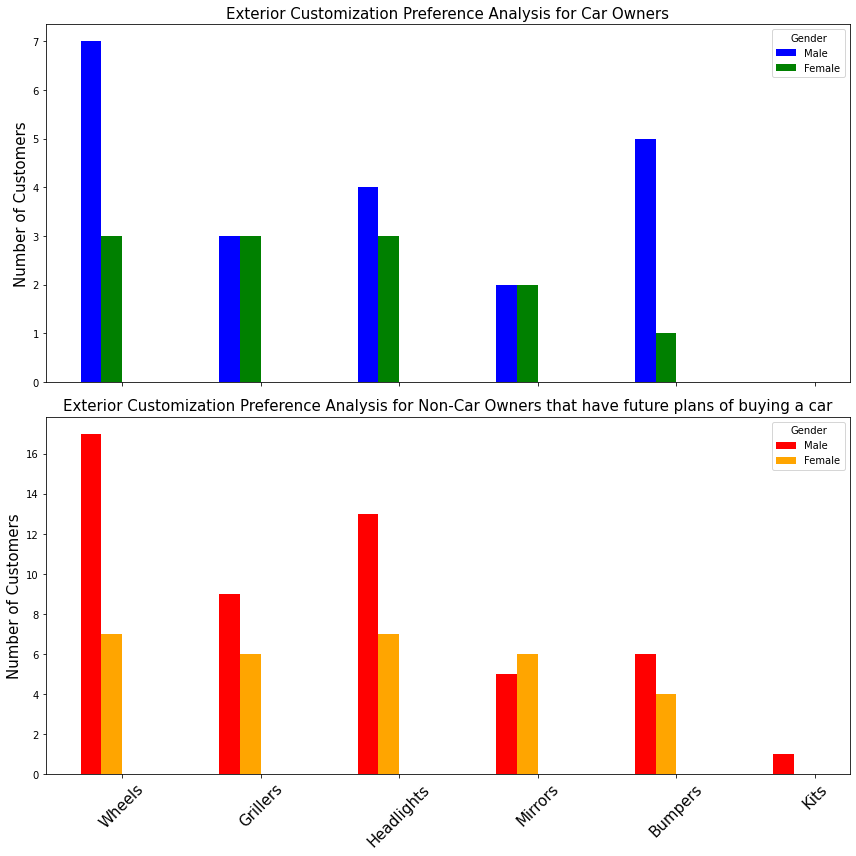

In [122]:
# Analsysis for those who already owns car
male_car_ext = [len(male_car_wheels), len(male_car_grilles), len(male_car_headlights), len(male_car_mirrors), len(male_car_bumpers), len(male_car_kit)]

female_car_ext = [len(female_car_wheels), len(female_car_grilles), len(female_car_headlights), len(female_car_mirrors), len(female_car_bumpers), len(female_car_kit)]

male_no_car_ext = [len(male_no_car_wheels), len(male_no_car_grilles), len(male_no_car_headlights), len(male_no_car_mirrors), len(male_no_car_bumpers), len(male_no_car_kit)]

female_no_car_ext = [len(female_no_car_wheels), len(female_no_car_grilles), len(female_no_car_headlights), len(female_no_car_mirrors), len(female_no_car_bumpers), len(female_no_car_kit)]


# Ext graph
index = ['Wheels', 'Grillers', 'Headlights', 'Mirrors', "Bumpers", "Kits"]

car_ext_bar = pd.DataFrame({'Male':male_car_ext, 'Female':female_car_ext}, index = index)
no_car_ext_bar = pd.DataFrame({'Male':male_no_car_ext, 'Female':female_no_car_ext}, index = index)
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))

# Plotting bars for car owners
car_ext_bar.plot.bar(ax=ax1, color=['blue', 'green'], width=0.3, position=1, align='center')
ax1.set_title('Exterior Customization Preference Analysis for Car Owners', fontsize = 15)
ax1.set_ylabel('Number of Customers', fontsize = 15)
ax1.legend(title='Gender')

# Plotting bars for non-car owners
no_car_ext_bar.plot.bar(ax=ax2, color=['red', 'orange'], width=0.3, position=1, align='center')
ax2.set_title('Exterior Customization Preference Analysis for Non-Car Owners that have future plans of buying a car', fontsize = 15)
ax2.set_ylabel('Number of Customers', fontsize = 15)
ax2.legend(title='Gender')

plt.xticks(rotation=45, fontsize = 15)
plt.tight_layout()
plt.show()


In [123]:
# Assuming FinalData is your DataFrame containing the relevant data

# Filter data for people who do not own a car
non_car_owners = FinalData[FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)]

# Extract customizations for non-car owners
non_car_owners_interior = non_car_owners["Interior Customisation"].apply(extract_customizations)

# Create a DataFrame with binary values for presence/absence of each component
interior_components_df = pd.DataFrame(columns=['Centre compartment', 'Steering wheel', 'Dashboard', 'Door handles', 'Sun blocker for front passengers', 'air vent'])

for component in interior_components_df.columns:
    interior_components_df[component] = non_car_owners_interior.apply(lambda x: 1 if component in x else 0)

# Find frequent itemsets
frequent_itemsets = apriori(interior_components_df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the association rules
print(rules)

                                          antecedents  \
0                                (Centre compartment)   
1                                    (Steering wheel)   
2                                      (Door handles)   
3                                (Centre compartment)   
4                                      (Door handles)   
5                                    (Steering wheel)   
6                     (Dashboard, Centre compartment)   
7                                    (Steering wheel)   
8                  (Door handles, Centre compartment)   
9                      (Door handles, Steering wheel)   
10               (Centre compartment, Steering wheel)   
11                                     (Door handles)   
12                               (Centre compartment)   
13                                   (Steering wheel)   
14                          (Dashboard, Door handles)   
15                    (Dashboard, Centre compartment)   
16                 (Door handle

C:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [124]:
# Filter data for car owners
car_owners = FinalData[FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)]

# Extract customizations for car owners
car_owners_interior = car_owners["Interior Customisation"].apply(extract_customizations)

# Create a DataFrame with binary values for presence/absence of each component for car owners
car_interior_components_df = pd.DataFrame(columns=['Centre compartment', 'Steering wheel', 'Dashboard', 'Door handles', 'Sun blocker for front passengers', 'air vent'])

for component in car_interior_components_df.columns:
    car_interior_components_df[component] = car_owners_interior.apply(lambda x: 1 if component in x else 0)

# Find frequent itemsets for car owners
car_frequent_itemsets = apriori(car_interior_components_df, min_support=0.1, use_colnames=True)

# Generate association rules for car owners
car_rules = association_rules(car_frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the association rules for car owners
print(car_rules)

                                          antecedents  \
0                                         (Dashboard)   
1                                (Centre compartment)   
2                                      (Door handles)   
3                                (Centre compartment)   
4                                         (Dashboard)   
5                                    (Steering wheel)   
6                                      (Door handles)   
7                                    (Steering wheel)   
8                (Centre compartment, Steering wheel)   
9                                         (Dashboard)   
10                 (Door handles, Centre compartment)   
11                     (Door handles, Steering wheel)   
12               (Centre compartment, Steering wheel)   
13                                     (Door handles)   
14                               (Centre compartment)   
15                                   (Steering wheel)   
16                          (Da

C:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [125]:
top_10_rules_support = rules.nlargest(10, 'support')
top_10_rules_confidence = rules.nlargest(10, 'confidence')
top_10_rules_lift = rules.nlargest(10, 'lift')

top_10_car_rules_support = car_rules.nlargest(10, 'support')
top_10_car_rules_confidence = car_rules.nlargest(10, 'confidence')
top_10_car_rules_lift = car_rules.nlargest(10, 'lift')

In [126]:
# Convert frozensets to sets
top_10_rules_support['antecedents'] = top_10_rules_support['antecedents'].apply(lambda x: set(x))
top_10_rules_support['consequents'] = top_10_rules_support['consequents'].apply(lambda x: set(x))

# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mInterior: Top 10 Rules Based on Support (Does not Own a Car):\033[0m")
print(tabulate(top_10_rules_support[['antecedents', 'consequents', 'support']], headers=['Antecedents', 'Consequents', 'Support'], tablefmt='pretty', showindex=False, numalign="right", stralign="left"))

Interior: Top 10 Rules Based on Support (Does not Own a Car):
+-------------------------------------+-------------------------------------+---------------------+
| Antecedents                         | Consequents                         | Support             |
+-------------------------------------+-------------------------------------+---------------------+
| {'Centre compartment'}              | {'Steering wheel'}                  | 0.3055555555555556  |
| {'Steering wheel'}                  | {'Centre compartment'}              | 0.3055555555555556  |
| {'Door handles'}                    | {'Steering wheel'}                  | 0.25                |
| {'Steering wheel'}                  | {'Door handles'}                    | 0.25                |
| {'Door handles'}                    | {'Centre compartment'}              | 0.19444444444444445 |
| {'Centre compartment'}              | {'Door handles'}                    | 0.19444444444444445 |
| {'Dashboard', 'Centre compartment'} 

## Antecedents: These are the items or itemsets that appear on the left-hand side of the association rule. They represent the conditions or events that precede or occur before the consequents. In simpler terms, antecedents are the "if" part of the rule.

## Consequents: These are the items or itemsets that appear on the right-hand side of the association rule. They represent the outcomes or events that follow or occur after the antecedents. Consequents are the "then" part of the rule.

## Support: Support is a measure of how frequently a rule appears in the dataset. It is calculated as the proportion of transactions in the dataset that contain both the antecedents and the consequents. A higher support value indicates that the rule is more frequently observed in the dataset.

In [127]:
# Convert frozensets to sets
top_10_rules_confidence['antecedents'] = top_10_rules_confidence['antecedents'].apply(lambda x: set(x))
top_10_rules_confidence['consequents'] = top_10_rules_confidence['consequents'].apply(lambda x: set(x))

# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mInterior: Top 10 Rules Based on Confidence (Does not Own a Car):\033[0m")
print(tabulate(top_10_rules_confidence[['antecedents', 'consequents', 'confidence']], headers=['Antecedents', 'Consequents', 'Confidence'], tablefmt='pretty', showindex=False, numalign="right", stralign="left"))

Interior: Top 10 Rules Based on Confidence (Does not Own a Car):
+----------------------------------------------------------+------------------------+--------------------+
| Antecedents                                              | Consequents            | Confidence         |
+----------------------------------------------------------+------------------------+--------------------+
| {'Dashboard', 'Door handles'}                            | {'Steering wheel'}     | 0.8571428571428571 |
| {'Door handles'}                                         | {'Steering wheel'}     | 0.8181818181818181 |
| {'Dashboard', 'Door handles', 'Centre compartment'}      | {'Steering wheel'}     | 0.7999999999999999 |
| {'Door handles', 'Centre compartment', 'Steering wheel'} | {'Dashboard'}          | 0.7999999999999999 |
| {'Dashboard', 'Centre compartment'}                      | {'Steering wheel'}     | 0.75               |
| {'Door handles', 'Centre compartment'}                   | {'Steering wheel'}

## if the confidence of a rule {antecedents} ➞ {consequents} is 0.8, it means that in 80% of the transactions containing the antecedents, the consequents are also present. This indicates a strong association between the antecedents and consequents.

In [128]:
# Convert frozensets to sets
top_10_rules_lift['antecedents'] = top_10_rules_lift['antecedents'].apply(lambda x: set(x))
top_10_rules_lift['consequents'] = top_10_rules_lift['consequents'].apply(lambda x: set(x))

# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mInterior: Top 10 Rules Based on Lift (Does not Own a Car):\033[0m")
print(tabulate(top_10_rules_lift[['antecedents', 'consequents', 'lift']], headers=['Antecedents', 'Consequents', 'Lift'], tablefmt='grid', showindex=False, numalign="right", stralign="left"))

Interior: Top 10 Rules Based on Lift (Does not Own a Car):
+-------------------------------------------------------+-------------------------------------------------------+---------+
| Antecedents                                           | Consequents                                           |    Lift |
+=======================================================+=======================================================+=========+
| {'Dashboard', 'Centre compartment', 'Steering wheel'} | {'Door handles'}                                      | 2.18182 |
+-------------------------------------------------------+-------------------------------------------------------+---------+
| {'Door handles'}                                      | {'Dashboard', 'Centre compartment', 'Steering wheel'} | 2.18182 |
+-------------------------------------------------------+-------------------------------------------------------+---------+
| {'Dashboard', 'Centre compartment'}                   | {'Door handles'

## if the lift of a rule {antecedents} ➞ {consequents} is 2, it means that the antecedents and consequents appear together twice as often as would be expected if they were independent. This suggests a positive association between the antecedents and consequents.

In [129]:
## car owners

# Convert frozensets to sets
top_10_car_rules_support['antecedents'] = top_10_car_rules_support['antecedents'].apply(lambda x: set(x))
top_10_car_rules_support['consequents'] = top_10_car_rules_support['consequents'].apply(lambda x: set(x))

top_10_car_rules_confidence['antecedents'] = top_10_car_rules_confidence['antecedents'].apply(lambda x: set(x))
top_10_car_rules_confidence['consequents'] = top_10_car_rules_confidence['consequents'].apply(lambda x: set(x))

top_10_car_rules_lift['antecedents'] = top_10_car_rules_lift['antecedents'].apply(lambda x: set(x))
top_10_car_rules_lift['consequents'] = top_10_car_rules_lift['consequents'].apply(lambda x: set(x))

In [130]:
# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mInterior: Top 10 Rules Based on Support (Own Car):\033[0m")
print(tabulate(top_10_car_rules_support[['antecedents', 'consequents', 'support']], headers=['Antecedents', 'Consequents', 'Support'], tablefmt='pretty', showindex=False, numalign="right", stralign="left"))

Interior: Top 10 Rules Based on Support (Own Car):
+------------------------------------------+------------------------------------------+---------------------+
| Antecedents                              | Consequents                              | Support             |
+------------------------------------------+------------------------------------------+---------------------+
| {'Dashboard'}                            | {'Centre compartment'}                   | 0.35714285714285715 |
| {'Centre compartment'}                   | {'Dashboard'}                            | 0.35714285714285715 |
| {'Dashboard'}                            | {'Steering wheel'}                       | 0.35714285714285715 |
| {'Steering wheel'}                       | {'Dashboard'}                            | 0.35714285714285715 |
| {'Door handles'}                         | {'Steering wheel'}                       | 0.21428571428571427 |
| {'Steering wheel'}                       | {'Door handles'}        

In [131]:
# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mInterior: Top 10 Rules Based on Confidence (Own Car):\033[0m")
print(tabulate(top_10_car_rules_confidence[['antecedents', 'consequents', 'confidence']], headers=['Antecedents', 'Consequents', 'Confidence'], tablefmt='pretty',showindex=False, numalign="right", stralign="left"))

Interior: Top 10 Rules Based on Confidence (Own Car):
+----------------------------------------------------------+------------------------+------------+
| Antecedents                                              | Consequents            | Confidence |
+----------------------------------------------------------+------------------------+------------+
| {'Centre compartment', 'Steering wheel'}                 | {'Dashboard'}          | 1.0        |
| {'Door handles', 'Centre compartment'}                   | {'Steering wheel'}     | 1.0        |
| {'Centre compartment', 'Steering wheel'}                 | {'Door handles'}       | 1.0        |
| {'Dashboard', 'Door handles'}                            | {'Centre compartment'} | 1.0        |
| {'Door handles', 'Centre compartment'}                   | {'Dashboard'}          | 1.0        |
| {'Dashboard', 'Door handles'}                            | {'Steering wheel'}     | 1.0        |
| {'Dashboard', 'Door handles', 'Centre compartment'}  

In [132]:
# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mInterior: Top 10 Rules Based on Lift (Own Car):\033[0m")
print(tabulate(top_10_car_rules_lift[['antecedents', 'consequents', 'lift']], headers=['Antecedents', 'Consequents', 'Lift'], tablefmt='grid', showindex=False, numalign="right", stralign="left"))

Interior: Top 10 Rules Based on Lift (Own Car):
+-------------------------------------------------------+-------------------------------------------------------+---------+
| Antecedents                                           | Consequents                                           |    Lift |
+=======================================================+=======================================================+=========+
| {'Dashboard', 'Door handles'}                         | {'Centre compartment', 'Steering wheel'}              |       7 |
+-------------------------------------------------------+-------------------------------------------------------+---------+
| {'Centre compartment', 'Steering wheel'}              | {'Dashboard', 'Door handles'}                         |       7 |
+-------------------------------------------------------+-------------------------------------------------------+---------+
| {'Centre compartment', 'Steering wheel'}              | {'Door handles'}          

## Exterior

In [136]:
# Filter data for people who do not own a car
non_car_owners = FinalData[FinalData["Car Ownership"].apply(lambda x: 'Do not own a car' in x)]

# Extract customizations for non-car owners
non_car_owners_exterior = non_car_owners["Exterior Customisation"].apply(extract_customizations)

# Create a DataFrame with binary values for presence/absence of each component
exterior_components_df = pd.DataFrame(columns=['Wheels', 'Grillers', 'Headlights', 'Mirrors', "Bumpers", "Kits"])
for component in exterior_components_df.columns:
    exterior_components_df[component] = non_car_owners_exterior.apply(lambda x: 1 if component in x else 0)

# Find frequent itemsets
frequent_itemsets_ext = apriori(exterior_components_df, min_support=0.1, use_colnames=True)

# Generate association rules
rules_ext = association_rules(frequent_itemsets_ext, metric="lift", min_threshold=1.0)

# Display the association rules
print(rules_ext)

             antecedents            consequents  antecedent support  \
0               (Wheels)           (Headlights)            0.694444   
1           (Headlights)               (Wheels)            0.555556   
2      (Wheels, Bumpers)           (Headlights)            0.111111   
3  (Headlights, Bumpers)               (Wheels)            0.138889   
4               (Wheels)  (Headlights, Bumpers)            0.694444   
5           (Headlights)      (Wheels, Bumpers)            0.555556   

   consequent support   support  confidence   lift  leverage  conviction  \
0            0.555556  0.444444        0.64  1.152  0.058642    1.234568   
1            0.694444  0.444444        0.80  1.152  0.058642    1.527778   
2            0.555556  0.111111        1.00  1.800  0.049383         inf   
3            0.694444  0.111111        0.80  1.152  0.014660    1.527778   
4            0.138889  0.111111        0.16  1.152  0.014660    1.025132   
5            0.111111  0.111111        0.20  1

C:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [138]:
# Filter data for car owners
car_owners = FinalData[FinalData["Car Ownership"].apply(lambda x: 'Own a car' in x or 'Own more than one car' in x)]

# Extract customizations for car owners
car_owners_exterior = car_owners["Exterior Customisation"].apply(extract_customizations)

# Create a DataFrame with binary values for presence/absence of each component for car owners
car_exterior_components_df =pd.DataFrame(columns=['Wheels', 'Grillers', 'Headlights', 'Mirrors', "Bumpers", "Kits"])

for component in car_exterior_components_df.columns:
    car_exterior_components_df[component] = car_owners_exterior.apply(lambda x: 1 if component in x else 0)

# Find frequent itemsets for car owners
car_frequent_itemsets_ext = apriori(car_exterior_components_df, min_support=0.1, use_colnames=True)

# Generate association rules for car owners
car_rules_ext = association_rules(car_frequent_itemsets_ext, metric="lift", min_threshold=1.0)

# Display the association rules for car owners
print(car_rules_ext)

              antecedents            consequents  antecedent support  \
0                (Wheels)           (Headlights)            0.714286   
1            (Headlights)               (Wheels)            0.500000   
2                (Wheels)              (Bumpers)            0.714286   
3               (Bumpers)               (Wheels)            0.428571   
4            (Headlights)              (Bumpers)            0.500000   
5               (Bumpers)           (Headlights)            0.428571   
6    (Wheels, Headlights)              (Bumpers)            0.428571   
7       (Wheels, Bumpers)           (Headlights)            0.428571   
8   (Headlights, Bumpers)               (Wheels)            0.214286   
9                (Wheels)  (Headlights, Bumpers)            0.714286   
10           (Headlights)      (Wheels, Bumpers)            0.500000   
11              (Bumpers)   (Wheels, Headlights)            0.428571   

    consequent support   support  confidence      lift  leverag

C:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [148]:
top_10_rules_support_ext = rules_ext.nlargest(5, 'support')
top_10_rules_confidence_ext = rules_ext.nlargest(5, 'confidence')
top_10_rules_lift_ext = rules_ext.nlargest(5, 'lift')

top_10_car_rules_support_ext = car_rules_ext.nlargest(10, 'support')
top_10_car_rules_confidence_ext = car_rules_ext.nlargest(10, 'confidence')
top_10_car_rules_lift_ext = car_rules_ext.nlargest(10, 'lift')

In [149]:
# Convert frozensets to sets
top_10_rules_support_ext['antecedents'] = top_10_rules_support_ext['antecedents'].apply(lambda x: set(x))
top_10_rules_support_ext['consequents'] = top_10_rules_support_ext['consequents'].apply(lambda x: set(x))

# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mExterior: Top 10 Rules Based on Support (Does not own a Car):\033[0m")
print(tabulate(top_10_rules_support_ext[['antecedents', 'consequents', 'support']], headers=['Antecedents', 'Consequents', 'Support'], tablefmt='pretty', showindex=False, numalign="right", stralign="left"))

Exterior: Top 10 Rules Based on Support (Does not own a Car):
+---------------------------+---------------------------+--------------------+
| Antecedents               | Consequents               | Support            |
+---------------------------+---------------------------+--------------------+
| {'Wheels'}                | {'Headlights'}            | 0.4444444444444444 |
| {'Headlights'}            | {'Wheels'}                | 0.4444444444444444 |
| {'Wheels', 'Bumpers'}     | {'Headlights'}            | 0.1111111111111111 |
| {'Headlights', 'Bumpers'} | {'Wheels'}                | 0.1111111111111111 |
| {'Wheels'}                | {'Headlights', 'Bumpers'} | 0.1111111111111111 |
+---------------------------+---------------------------+--------------------+


In [143]:
# Convert frozensets to sets
top_10_rules_confidence_ext['antecedents'] = top_10_rules_confidence_ext['antecedents'].apply(lambda x: set(x))
top_10_rules_confidence_ext['consequents'] = top_10_rules_confidence_ext['consequents'].apply(lambda x: set(x))

# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mExterior: Top 10 Rules Based on Confidence (Does not Own a Car):\033[0m")
print(tabulate(top_10_rules_confidence_ext[['antecedents', 'consequents', 'confidence']], headers=['Antecedents', 'Consequents', 'Confidence'], tablefmt='pretty', showindex=False, numalign="right", stralign="left"))

Exterior: Top 10 Rules Based on Confidence (Does not Own a Car):
+---------------------------+---------------------------+---------------------+
| Antecedents               | Consequents               | Confidence          |
+---------------------------+---------------------------+---------------------+
| {'Wheels', 'Bumpers'}     | {'Headlights'}            | 1.0                 |
| {'Headlights'}            | {'Wheels'}                | 0.7999999999999999  |
| {'Headlights', 'Bumpers'} | {'Wheels'}                | 0.7999999999999999  |
| {'Wheels'}                | {'Headlights'}            | 0.64                |
| {'Headlights'}            | {'Wheels', 'Bumpers'}     | 0.19999999999999998 |
| {'Wheels'}                | {'Headlights', 'Bumpers'} | 0.16                |
+---------------------------+---------------------------+---------------------+


In [150]:
# Convert frozensets to sets
top_10_rules_lift_ext['antecedents'] = top_10_rules_lift_ext['antecedents'].apply(lambda x: set(x))
top_10_rules_lift_ext['consequents'] = top_10_rules_lift_ext['consequents'].apply(lambda x: set(x))

# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mExterior: Top 10 Rules Based on Lift (Does not Own a Car):\033[0m")
print(tabulate(top_10_rules_lift_ext[['antecedents', 'consequents', 'lift']], headers=['Antecedents', 'Consequents', 'Lift'], tablefmt='grid', showindex=False, numalign="right", stralign="left"))

Exterior: Top 10 Rules Based on Lift (Does not Own a Car):
+---------------------------+-----------------------+--------+
| Antecedents               | Consequents           |   Lift |
+===========================+=======================+========+
| {'Headlights'}            | {'Wheels', 'Bumpers'} |    1.8 |
+---------------------------+-----------------------+--------+
| {'Wheels', 'Bumpers'}     | {'Headlights'}        |    1.8 |
+---------------------------+-----------------------+--------+
| {'Wheels'}                | {'Headlights'}        |  1.152 |
+---------------------------+-----------------------+--------+
| {'Headlights'}            | {'Wheels'}            |  1.152 |
+---------------------------+-----------------------+--------+
| {'Headlights', 'Bumpers'} | {'Wheels'}            |  1.152 |
+---------------------------+-----------------------+--------+


In [141]:
# Convert frozensets to sets
top_10_car_rules_support_ext['antecedents'] = top_10_car_rules_support_ext['antecedents'].apply(lambda x: set(x))
top_10_car_rules_support_ext['consequents'] = top_10_car_rules_support_ext['consequents'].apply(lambda x: set(x))

# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mExterior: Top 10 Rules Based on Support (Own a Car):\033[0m")
print(tabulate(top_10_car_rules_support_ext[['antecedents', 'consequents', 'support']], headers=['Antecedents', 'Consequents', 'Support'], tablefmt='pretty', showindex=False, numalign="right", stralign="left"))

Exterior: Top 10 Rules Based on Support (Own a Car):
+---------------------------+---------------------------+---------------------+
| Antecedents               | Consequents               | Support             |
+---------------------------+---------------------------+---------------------+
| {'Wheels'}                | {'Headlights'}            | 0.42857142857142855 |
| {'Headlights'}            | {'Wheels'}                | 0.42857142857142855 |
| {'Wheels'}                | {'Bumpers'}               | 0.42857142857142855 |
| {'Bumpers'}               | {'Wheels'}                | 0.42857142857142855 |
| {'Headlights'}            | {'Bumpers'}               | 0.21428571428571427 |
| {'Bumpers'}               | {'Headlights'}            | 0.21428571428571427 |
| {'Wheels', 'Headlights'}  | {'Bumpers'}               | 0.21428571428571427 |
| {'Wheels', 'Bumpers'}     | {'Headlights'}            | 0.21428571428571427 |
| {'Headlights', 'Bumpers'} | {'Wheels'}                | 0.2142857

In [144]:
# Convert frozensets to sets
top_10_car_rules_confidence_ext['antecedents'] = top_10_car_rules_confidence_ext['antecedents'].apply(lambda x: set(x))
top_10_car_rules_confidence_ext['consequents'] = top_10_car_rules_confidence_ext['consequents'].apply(lambda x: set(x))

# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mExterior: Top 10 Rules Based on Confidence (Own a Car):\033[0m")
print(tabulate(top_10_car_rules_confidence_ext[['antecedents', 'consequents', 'confidence']], headers=['Antecedents', 'Consequents', 'Confidence'], tablefmt='pretty', showindex=False, numalign="right", stralign="left"))

Exterior: Top 10 Rules Based on Confidence (Own a Car):
+---------------------------+--------------------------+---------------------+
| Antecedents               | Consequents              | Confidence          |
+---------------------------+--------------------------+---------------------+
| {'Bumpers'}               | {'Wheels'}               | 1.0                 |
| {'Headlights', 'Bumpers'} | {'Wheels'}               | 1.0                 |
| {'Headlights'}            | {'Wheels'}               | 0.8571428571428571  |
| {'Wheels'}                | {'Headlights'}           | 0.6                 |
| {'Wheels'}                | {'Bumpers'}              | 0.6                 |
| {'Bumpers'}               | {'Headlights'}           | 0.5                 |
| {'Wheels', 'Headlights'}  | {'Bumpers'}              | 0.5                 |
| {'Wheels', 'Bumpers'}     | {'Headlights'}           | 0.5                 |
| {'Bumpers'}               | {'Wheels', 'Headlights'} | 0.5               

In [146]:
# Convert frozensets to sets
top_10_car_rules_lift_ext['antecedents'] = top_10_car_rules_lift_ext['antecedents'].apply(lambda x: set(x))
top_10_car_rules_lift_ext['consequents'] = top_10_car_rules_lift_ext['consequents'].apply(lambda x: set(x))

# Print the top 10 rules showing only antecedents, consequents, and support in a nice table format
print("\033[1mExterior: Top 10 Rules Based on Lift (Own a Car):\033[0m")
print(tabulate(top_10_car_rules_lift_ext[['antecedents', 'consequents', 'lift']], headers=['Antecedents', 'Consequents', 'Lift'], tablefmt='grid', showindex=False, numalign="right", stralign="left"))

Exterior: Top 10 Rules Based on Lift (Own a Car):
+---------------------------+---------------------------+---------+
| Antecedents               | Consequents               |    Lift |
+===========================+===========================+=========+
| {'Wheels'}                | {'Bumpers'}               |     1.4 |
+---------------------------+---------------------------+---------+
| {'Wheels'}                | {'Headlights', 'Bumpers'} |     1.4 |
+---------------------------+---------------------------+---------+
| {'Bumpers'}               | {'Wheels'}                |     1.4 |
+---------------------------+---------------------------+---------+
| {'Headlights', 'Bumpers'} | {'Wheels'}                |     1.4 |
+---------------------------+---------------------------+---------+
| {'Wheels'}                | {'Headlights'}            |     1.2 |
+---------------------------+---------------------------+---------+
| {'Headlights'}            | {'Wheels'}                |     1.2 

# KMEANS

In [ ]:
NewData1 NewData1.fillna('NA')

# Assuming you want to replace values in column 'Cost of Customisation'
NewData1['Cost of Customisation'] = NewData1['Cost of Customisation'].replace('under 500', '0-500')
NewData1['Cost of Customisation'] = NewData1['Cost of Customisation'].replace('over 1000', '1000-1500')
NewData1['Cost of Customisation'] = NewData1['Cost of Customisation'].replace('100-500', '0-500')

# Assuming you want to replace values in column 'Cost of Self Design'
NewData1['Cost of Self Design'] = NewData1['Cost of Self Design'].replace('under 500', '0-500')
NewData1['Cost of Self Design'] = NewData1['Cost of Self Design'].replace('over 1000', '1000-1500')
NewData1['Cost of Self Design'] = NewData1['Cost of Self Design'].replace('100-500', '0-500')

NewData1.head(5)

In [ ]:
# Splitting string values

NewData1["Car Ownership"] = NewData1["Car Ownership"].str.split(pat = ",", n = -1, expand = False)
NewData1["Purchasing Factors"] = NewData1["Purchasing Factors"].str.split(pat = ";", n = -1, expand = False)
NewData1["Exterior Customisation"] = NewData1["Exterior Customisation"].str.split(pat = ";", n = -1, expand = False)
NewData1["Interior Customisation"] = NewData1["Interior Customisation"].str.split(pat = ";", n = -1, expand = False)

FinalData1 = NewData1

In [ ]:
FinalData1["Car Ownership"] = FinalData1["Car Ownership"].astype('string')
FinalData1["Purchasing Factors"] = FinalData1["Purchasing Factors"].astype('string')
FinalData1["Exterior Customisation"] = FinalData1["Exterior Customisation"].astype('string')
FinalData1["Interior Customisation"] = FinalData1["Interior Customisation"].astype('string')
FinalData1.dtypes

In [ ]:
FinalData1.head(5)

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Dictionary for 'Age Group'
Age_Group_unique = sorted(FinalData1['Age Group'].unique())
Age_Group_encoded_labels = label_encoder.fit_transform(Age_Group_unique)
Age_Group_label_mapping = dict(zip(Age_Group_unique, Age_Group_encoded_labels))

# Dictionary for 'Gender'
Gender_unique = sorted(FinalData1['Gender'].unique())
Gender_encoded_labels = label_encoder.fit_transform(Gender_unique)
Gender_label_mapping = dict(zip(Gender_unique, Gender_encoded_labels))

# Dictionary for 'Car Ownership'
Car_Ownership_unique = sorted(FinalData1['Car Ownership'].unique())
Car_Ownership_encoded_labels = label_encoder.fit_transform(Car_Ownership_unique)
Car_Ownership_label_mapping = dict(zip(Car_Ownership_unique, Car_Ownership_encoded_labels))

# Dictionary for 'Marital Status'
Marital_Status_unique = sorted(FinalData1['Marital Status'].unique())
Marital_Status_encoded_labels = label_encoder.fit_transform(Marital_Status_unique)
Marital_Status_label_mapping = dict(zip(Marital_Status_unique, Marital_Status_encoded_labels))

# Dictionary for 'Purchasing Factors'
Purchasing_Factors_unique = sorted(FinalData1['Purchasing Factors'].unique())
Purchasing_Factors_encoded_labels = label_encoder.fit_transform(Purchasing_Factors_unique)
Purchasing_Factors_label_mapping = dict(zip(Purchasing_Factors_unique, Purchasing_Factors_encoded_labels))

# Dictionary for 'Likelihood of Customization'
Likelihood_of_Customization_unique = sorted(FinalData1['Likelihood of Customization'].unique())
Likelihood_of_Customization_encoded_labels = label_encoder.fit_transform(Likelihood_of_Customization_unique)
Likelihood_of_Customization_label_mapping = dict(zip(Likelihood_of_Customization_unique, Likelihood_of_Customization_encoded_labels))

# Dictionary for 'Exterior Customisation'
Exterior_Customisation_unique = sorted(FinalData1['Exterior Customisation'].unique())
Exterior_Customisation_encoded_labels = label_encoder.fit_transform(Exterior_Customisation_unique)
Exterior_Customisation_label_mapping = dict(zip(Exterior_Customisation_unique, Exterior_Customisation_encoded_labels))

# Dictionary for 'Interior Customisation'
Interior_Customisation_unique = sorted(FinalData1['Interior Customisation'].unique())
Interior_Customisation_encoded_labels = label_encoder.fit_transform(Interior_Customisation_unique)
Interior_Customisation_label_mapping = dict(zip(Interior_Customisation_unique, Interior_Customisation_encoded_labels))

# Dictionary for 'Cost of Customisation'
Cost_of_Customisation_unique = sorted(FinalData1['Cost of Customisation'].unique())
Cost_of_Customisation_encoded_labels = label_encoder.fit_transform(Cost_of_Customisation_unique)
Cost_of_Customisation_label_mapping = dict(zip(Cost_of_Customisation_unique, Cost_of_Customisation_encoded_labels))

# Dictionary for 'Self Design'
Self_Design_unique = sorted(FinalData1['Self Design'].unique())
Self_Design_encoded_labels = label_encoder.fit_transform(Self_Design_unique)
Self_Design_label_mapping = dict(zip(Self_Design_unique, Self_Design_encoded_labels))

# Dictionary for 'Cost of Self Design'
Cost_of_Self_Design_unique = sorted(FinalData1['Cost of Self Design'].unique())
Cost_of_Self_Design_encoded_labels = label_encoder.fit_transform(Cost_of_Self_Design_unique)
Cost_of_Self_Design_label_mapping = dict(zip(Cost_of_Self_Design_unique, Cost_of_Self_Design_encoded_labels))

# Dictionary for '3D exp'
ThreeD_exp_unique = sorted(FinalData1['3D exp'].unique())
ThreeD_exp_encoded_labels = label_encoder.fit_transform(ThreeD_exp_unique)
ThreeD_exp_label_mapping = dict(zip(ThreeD_exp_unique, ThreeD_exp_encoded_labels))




In [ ]:
# Encode categorical variables and create new columns
FinalData1['Age Group Encoded'] = label_encoder.fit_transform(FinalData['Age Group'])
FinalData1['Gender Encoded'] = label_encoder.fit_transform(FinalData['Gender'])
FinalData1['Car Ownership Encoded'] = label_encoder.fit_transform(FinalData['Car Ownership'])
FinalData1['Marital Status Encoded'] = label_encoder.fit_transform(FinalData['Marital Status'])
FinalData1['Purchasing Factors Encoded'] = label_encoder.fit_transform(FinalData['Purchasing Factors'])
FinalData1['Likelihood of Customization Encoded'] = label_encoder.fit_transform(FinalData['Likelihood of Customization'])
FinalData1['Exterior Customisation Encoded'] = label_encoder.fit_transform(FinalData['Exterior Customisation'])
FinalData1['Interior Customisation Encoded'] = label_encoder.fit_transform(FinalData['Interior Customisation'])
FinalData1['Cost of Customisation Encoded'] = label_encoder.fit_transform(FinalData['Cost of Customisation'])
FinalData1['Self Design Encoded'] = label_encoder.fit_transform(FinalData['Self Design'])
FinalData1['Cost of Self Design Encoded'] = label_encoder.fit_transform(FinalData['Cost of Self Design'])
FinalData1['3D exp Encoded'] = label_encoder.fit_transform(FinalData['3D exp']) 


In [ ]:
# Check if the columns exist in FinalData1
if 'Age Group Encoded' in FinalData1.columns and 'Cost of Customisation Encoded' in FinalData1.columns:
    # Print the first few rows of these columns
    print(FinalData1[['Age Group Encoded', 'Cost of Customisation Encoded']].head())
else:
    print("One or both of the columns do not exist in FinalData1.")


In [ ]:
# Check for missing values in the columns
missing_values = FinalData1[['Age Group Encoded', 'Cost of Customisation Encoded']].isnull().sum()
print("Missing values:\n", missing_values)

## Age Group to Cost Customisation

In [ ]:
# Define a range of k values
k_values = range(1, 11)  # trying k from 1 to 10

# Initialize list to store within-cluster sum of squares (WCSS) for each k
wcss = []

# Perform k-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(FinalData1[['Age Group Encoded', 'Cost of Customisation Encoded']]
)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
def count_points_per_cluster(labels):
    counts = {}
    for label in set(labels):
        count = np.sum(labels == label)
        counts[label] = count
    return counts

# Extracting the features
X = FinalData1[['Age Group Encoded', 'Cost of Customisation Encoded']]

# Define the number of clusters
k = 4

# Initializing KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age Group Encoded', y='Cost of Customisation Encoded', data=FinalData1, hue=labels, palette='viridis', legend='full', alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

# Annotating cluster centers with labels
for i, center in enumerate(cluster_centers):
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, color='black', ha='center', va='center')

# Counting points per cluster and displaying
counts = count_points_per_cluster(labels)
for cluster, count in counts.items():
    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], f'Count: {count}', fontsize=10, color='blue', ha='right', va='bottom')

# Adding custom legend for mapping of original item names to numerical labels
legend_text = '\n'.join([f"{item}: {label}" for item, label in Age_Group_label_mapping.items()])
plt.text(0.95, 0.1, f'X axis original item names to numerical labels:\n{legend_text}', transform=plt.gca().transAxes, fontsize=8, color='green', ha='left')

# Adding custom legend for mapping of original item names to numerical labels
legend_text_1 = '\n'.join([f"{item}: {label}" for item, label in Cost_of_Customisation_label_mapping.items()])
plt.text(0.95, 0.1, f'Y axis original item names to numerical labels:\n{legend_text_1}', transform=plt.gca().transAxes, fontsize=8, color='red', ha='right')

plt.title('KMeans Clustering - Topic 1')
plt.xlabel('Age Group Encoded')
plt.ylabel('Cost of Customisation Encoded')
plt.legend()
plt.show()


## Gender to Likelihood for Customisation

In [ ]:
# Define a range of k values
k_values = range(1, 11)  # trying k from 1 to 10

# Initialize list to store within-cluster sum of squares (WCSS) for each k
wcss = []

# Perform k-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(FinalData1[['Gender Encoded', 'Likelihood of Customization Encoded']]
)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
def count_points_per_cluster(labels):
    counts = {}
    for label in set(labels):
        count = np.sum(labels == label)
        counts[label] = count
    return counts

# Extracting the features
X = FinalData1[['Gender Encoded', 'Likelihood of Customization Encoded']]

# Define the number of clusters
k = 3

# Initializing KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gender Encoded', y='Likelihood of Customization Encoded', data=FinalData1, hue=labels, palette='viridis', legend='full', alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

# Annotating cluster centers with labels
for i, center in enumerate(cluster_centers):
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, color='black', ha='center', va='center')

# Counting points per cluster and displaying
counts = count_points_per_cluster(labels)
for cluster, count in counts.items():
    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], f'Count: {count}', fontsize=10, color='blue', ha='right', va='bottom')

# Adding custom legend for mapping of original item names to numerical labels
legend_text = '\n'.join([f"{item}: {label}" for item, label in Gender_label_mapping.items()])
plt.text(0.95, 0.1, f'X axis original item names to numerical labels:\n{legend_text}', transform=plt.gca().transAxes, fontsize=8, color='green', ha='left')

# Adding custom legend for mapping of original item names to numerical labels
legend_text_1 = '\n'.join([f"{item}: {label}" for item, label in Likelihood_of_Customization_label_mapping.items()])
plt.text(0.95, 0.1, f'Y axis original item names to numerical labels:\n{legend_text_1}', transform=plt.gca().transAxes, fontsize=8, color='red', ha='right')

plt.title('KMeans Clustering - Topic 2')
plt.xlabel('Gender Encoded')
plt.ylabel('Likelihood of Customization Encoded')
plt.legend()
plt.show()


## Marital Status to Purchasing Factors

In [ ]:
# Define a range of k values
k_values = range(1, 11)  # trying k from 1 to 10

# Initialize list to store within-cluster sum of squares (WCSS) for each k
wcss = []

# Perform k-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(FinalData1[['Marital Status Encoded', 'Purchasing Factors Encoded']]
)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
def count_points_per_cluster(labels):
    counts = {}
    for label in set(labels):
        count = np.sum(labels == label)
        counts[label] = count
    return counts

# Extracting the features
X = FinalData1[['Marital Status Encoded', 'Purchasing Factors Encoded']]

# Define the number of clusters
k = 3

# Initializing KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marital Status Encoded', y='Purchasing Factors Encoded', data=FinalData1, hue=labels, palette='viridis', legend='full', alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

# Annotating cluster centers with labels
for i, center in enumerate(cluster_centers):
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, color='black', ha='center', va='center')

# Counting points per cluster and displaying
counts = count_points_per_cluster(labels)
for cluster, count in counts.items():
    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], f'Count: {count}', fontsize=10, color='blue', ha='right', va='bottom')

# Adding custom legend for mapping of original item names to numerical labels
legend_text = '\n'.join([f"{item}: {label}" for item, label in Marital_Status_label_mapping.items()])
plt.text(0.95, 0.1, f'X axis original item names to numerical labels:\n{legend_text}', transform=plt.gca().transAxes, fontsize=8, color='green', ha='left')

# Adding custom legend for mapping of original item names to numerical labels
legend_text_1 = '\n'.join([f"{item}: {label}" for item, label in Purchasing_Factors_label_mapping.items()])
plt.text(0.95, 0.1, f'Y axis original item names to numerical labels:\n{legend_text_1}', transform=plt.gca().transAxes, fontsize=8, color='red', ha='right')

plt.title('KMeans Clustering - Topic 3')
plt.xlabel('Marital Status Encoded')
plt.ylabel('Purchasing Factors Encoded')
plt.legend()
plt.show()


## Purchasing Factors to Cost of Customisation

In [ ]:
# Define a range of k values
k_values = range(1, 11)  # trying k from 1 to 10

# Initialize list to store within-cluster sum of squares (WCSS) for each k
wcss = []

# Perform k-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(FinalData1[['Purchasing Factors Encoded', 'Cost of Customisation Encoded']]
)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
def count_points_per_cluster(labels):
    counts = {}
    for label in set(labels):
        count = np.sum(labels == label)
        counts[label] = count
    return counts

# Extracting the features
X = FinalData1[['Purchasing Factors Encoded', 'Cost of Customisation Encoded']]

# Define the number of clusters
k = 3

# Initializing KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchasing Factors Encoded', y='Cost of Customisation Encoded', data=FinalData1, hue=labels, palette='viridis', legend='full', alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

# Annotating cluster centers with labels
for i, center in enumerate(cluster_centers):
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, color='black', ha='center', va='center')

# Counting points per cluster and displaying
counts = count_points_per_cluster(labels)
for cluster, count in counts.items():
    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], f'Count: {count}', fontsize=10, color='blue', ha='right', va='bottom')
    
# Adding custom legend for mapping of original item names to numerical labels
legend_text = '\n'.join([f"{item}: {label}" for item, label in Purchasing_Factors_label_mapping.items()])
plt.text(0.95, 0.1, f'X axis original item names to numerical labels:\n{legend_text}', transform=plt.gca().transAxes, fontsize=8, color='green', ha='left')

# Adding custom legend for mapping of original item names to numerical labels
legend_text_1 = '\n'.join([f"{item}: {label}" for item, label in Cost_of_Customisation_label_mapping.items()])
plt.text(0.95, 0.1, f'Y axis original item names to numerical labels:\n{legend_text_1}', transform=plt.gca().transAxes, fontsize=8, color='red', ha='right')

plt.title('KMeans Clustering - Topic 4')
plt.xlabel('Purchasing Factors Encoded')
plt.ylabel('Cost of Customisation Encoded')
plt.legend()
plt.show()


## 3D exp to Cost of Design

In [ ]:
# Define a range of k values
k_values = range(1, 11)  # trying k from 1 to 10

# Initialize list to store within-cluster sum of squares (WCSS) for each k
wcss = []

# Perform k-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(FinalData1[['3D exp Encoded', 'Cost of Self Design Encoded']]
)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
def count_points_per_cluster(labels):
    counts = {}
    for label in set(labels):
        count = np.sum(labels == label)
        counts[label] = count
    return counts

# Extracting the features
X = FinalData1[['3D exp Encoded', 'Cost of Self Design Encoded']]

# Define the number of clusters
k = 2

# Initializing KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='3D exp Encoded', y='Cost of Self Design Encoded', data=FinalData1, hue=labels, palette='viridis', legend='full', alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

# Annotating cluster centers with labels
for i, center in enumerate(cluster_centers):
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, color='black', ha='center', va='center')

# Counting points per cluster and displaying
counts = count_points_per_cluster(labels)
for cluster, count in counts.items():
    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], f'Count: {count}', fontsize=10, color='blue', ha='right', va='bottom')

# Adding custom legend for mapping of original item names to numerical labels
legend_text = '\n'.join([f"{item}: {label}" for item, label in ThreeD_exp_label_mapping.items()])
plt.text(0.95, 0.1, f'X axis original item names to numerical labels:\n{legend_text}', transform=plt.gca().transAxes, fontsize=8, color='green', ha='left')

# Adding custom legend for mapping of original item names to numerical labels
legend_text_1 = '\n'.join([f"{item}: {label}" for item, label in Cost_of_Self_Design_label_mapping.items()])
plt.text(0.95, 0.1, f'Y axis original item names to numerical labels:\n{legend_text_1}', transform=plt.gca().transAxes, fontsize=8, color='red', ha='right')

plt.title('KMeans Clustering - Topic 5')
plt.xlabel('3D exp Encoded')
plt.ylabel('Cost of Self Design Encoded')
plt.legend()
plt.show()


## Exterior Customisation to Interior Customistaion

In [ ]:
# Define a range of k values
k_values = range(1, 11)  # trying k from 1 to 10

# Initialize list to store within-cluster sum of squares (WCSS) for each k
wcss = []

# Perform k-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(FinalData1[['Exterior Customisation Encoded', 'Interior Customisation Encoded']]
)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
def count_points_per_cluster(labels):
    counts = {}
    for label in set(labels):
        count = np.sum(labels == label)
        counts[label] = count
    return counts

# Extracting the features
X = FinalData[['Exterior Customisation Encoded', 'Interior Customisation Encoded']]

# Define the number of clusters
k = 2

# Initializing KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exterior Customisation Encoded', y='Interior Customisation Encoded', data=FinalData1, hue=labels, palette='viridis', legend='full', alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

# Annotating cluster centers with labels
for i, center in enumerate(cluster_centers):
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, color='black', ha='center', va='center')

# Counting points per cluster and displaying
counts = count_points_per_cluster(labels)
for cluster, count in counts.items():
    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], f'Count: {count}', fontsize=10, color='blue', ha='right', va='bottom')

    
# Adding custom legend for mapping of original item names to numerical labels
legend_text = '\n'.join([f"{item}: {label}" for item, label in Exterior_Customisation_label_mapping.items()])
plt.text(0.95, 0.1, f'X axis original item names to numerical labels:\n{legend_text}', transform=plt.gca().transAxes, fontsize=8, color='green', ha='left')

# Adding custom legend for mapping of original item names to numerical labels
legend_text_1 = '\n'.join([f"{item}: {label}" for item, label in Interior_Customisation_label_mapping.items()])
plt.text(0.95, 0.1, f'Y axis original item names to numerical labels:\n{legend_text_1}', transform=plt.gca().transAxes, fontsize=8, color='red', ha='right')

plt.title('KMeans Clustering - Topic 6')
plt.xlabel('Exterior Customisation Encoded')
plt.ylabel('Interior Customisation Encoded')
plt.legend()
plt.show()


## Cost of Customisaion to Cost of Self Design

In [ ]:
def count_points_per_cluster(labels):
    counts = {}
    for label in set(labels):
        count = np.sum(labels == label)
        counts[label] = count
    return counts

# Extracting the features
X = FinalData1[['Cost of Customisation Encoded', 'Cost of Self Design Encoded']]

# Define the number of clusters
k = 4

# Initializing KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of Customisation Encoded', y='Cost of Self Design Encoded', data=FinalData1, hue=labels, palette='viridis', legend='full', alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

# Annotating cluster centers with labels
for i, center in enumerate(cluster_centers):
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, color='black', ha='center', va='center')

# Counting points per cluster and displaying
counts = count_points_per_cluster(labels)
for cluster, count in counts.items():
    plt.text(cluster_centers[cluster][0], cluster_centers[cluster][1], f'Count: {count}', fontsize=10, color='blue', ha='right', va='bottom')

# Adding custom legend for mapping of original item names to numerical labels
legend_text = '\n'.join([f"{item}: {label}" for item, label in Cost_of_Customisation_label_mapping.items()])
plt.text(0.95, 0.1, f'X axis original item names to numerical labels:\n{legend_text}', transform=plt.gca().transAxes, fontsize=8, color='green', ha='left')

# Adding custom legend for mapping of original item names to numerical labels
legend_text_1 = '\n'.join([f"{item}: {label}" for item, label in Cost_of_Self_Design_label_mapping.items()])
plt.text(0.95, 0.1, f'Y axis original item names to numerical labels:\n{legend_text_1}', transform=plt.gca().transAxes, fontsize=8, color='red', ha='right')

plt.title('KMeans Clustering - Topic 7')
plt.xlabel('Cost of Customisation Encoded')
plt.ylabel('Cost of Self Design Encoded')
plt.legend()
plt.show()
